In [10]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from skimage.metrics import structural_similarity as ss

# Approximating Images with circles using Differential Evolution Algorithms

#### Helper functions

In [3]:
def load_image(image_path, size=None):
    target = cv2.imread(image_path, cv2.IMREAD_COLOR)
    target = cv2.cvtColor(target, cv2.COLOR_BGR2RGB)

    if size:
        target = cv2.resize(src=target, dsize=size, interpolation=cv2.INTER_AREA)
    return target

In [4]:
def show_image(img_arr):
    plt.figure()
    plt.axis("off")
    plt.imshow(img_arr / 255)
    plt.show()

(64, 64, 3)


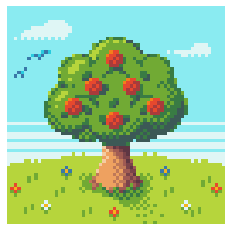

In [14]:
target = load_image("./arbol.png", size=(64, 64))
print(target.shape)
show_image(target)

In [58]:
bounds = [
    [0,1],                     # X position
    [0,1],                     # Y position
    [0,0.5],                      # Radius
    [0,1],                      # Red
    [0,1],                      # Green
    [0,1],                      # Blue
    [0,1]                       # Alpha
]

In [32]:
def generate_circle(bounds):
    var_no = len(bounds)
    
    circle = []
    for bound in bounds:
        circle.append(np.random.uniform(bound[0], bound[1]))

    return circle
        

In [59]:
circles = [generate_circle(bounds) for _ in range(10)]

<class 'matplotlib.figure.Figure'> <class 'matplotlib.axes._subplots.AxesSubplot'>


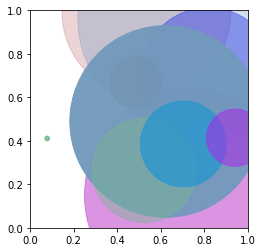

In [61]:
# plt.Circle((X,Y), radius, color, alpha)

#circle1 = plt.Circle((c[0], c[1]), radius=c[2], color=(c[3], c[4], c[5]), alpha=c[6])

fig, ax = plt.subplots()
print(type(fig), type(ax))
ax.set_aspect( 1 )

for c in circles:
    circle1 = plt.Circle((c[0], c[1]), radius=c[2], color=(c[3], c[4], c[5]), alpha=c[6])
    ax.add_patch(circle1)

plt.show()

In [ ]:
class Fitness:
    def __init__(self, target):
        self.target = target
        self.max_error = (np.square((1 - (self.target >= 127)) * 255 - self.target)).mean(axis=None)

    def score(self, individual):
        fit = (np.square(individual - self.target)).mean(axis=None)
        fit = (self.max_error - fit) / self.max_error
        return fit

In [11]:
class Individual:
    def __init__(self, size, genes=128, genotype=None):
        self.size = size
        self.genotype_width = 5 if len(size) < 3 else 7
        self.genotype = genotype if genotype is not None else np.random.rand(genes, self.genotype_width)
        self.gtype_img = np.zeros(size)

    def genes(self):
        return self.genotype.shape[0]

    def genotype_to_image(self):
        self.gtype_img.fill(0)
        radius_avg = (self.size[0] + self.size[1]) / 2 / 6
        
        for row in self.genotype:
            overlay = self.gtype_img.copy()
            color = (row[3:-1] * 255).astype(int).tolist()
            cv2.circle(
                overlay,
                center = (int(row[1] * self.size[1]), int(row[0] * self.size[0])),
                radius = int(row[2] * radius_avg),
                color = color,
                thickness = -1,
            )

            alpha = row[-1]
            self.gtype_img = cv2.addWeighted(overlay, alpha, self.gtype_img, 1 - alpha, 0)



In [ ]:
class DifferentialEvolition:
    def __init__(self, target, genes=100):
        self.size = target.shape        # np.shape of target image
        self.target = target            # Target image for evolutio
        self.generations = 1            # No. of generations
        self.genes = genes              # No. of circle to train the target image on
        self.specie = Individual(size=self.size, genes=genes)

    